# **Project CV : OIL-SPILL DETECTIONS**

In [1]:
!pip install roboflow
!pip install albumentations
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install opencv-python
!pip install numpy
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import cv2
from pathlib import Path
from sklearn.model_selection import train_test_split
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Data loading

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="jvtRZ14U8JM4ZMU0YvJz")
project = rf.workspace("konstantinos-gkountakos").project("lados")
version = project.version(2)
dataset = version.download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LADOS-2 in coco-segmentation:: 100%|██████████| 3396/3396 [00:04<00:00, 713.31it/s]


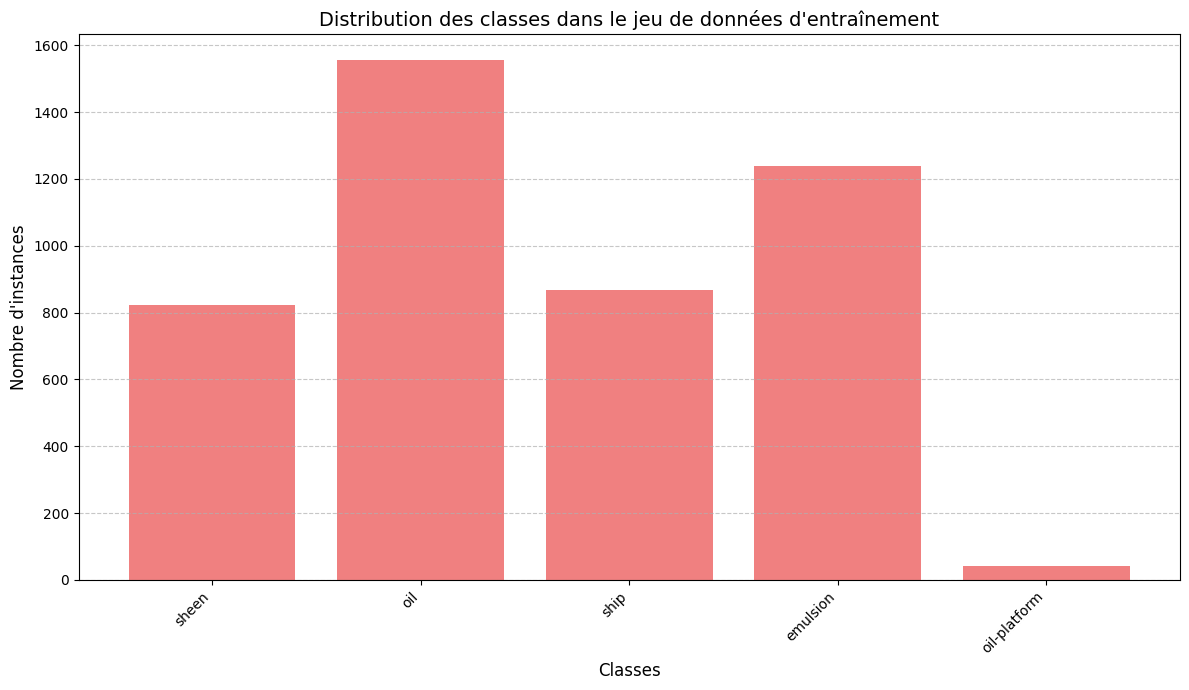


Répartition des classes :
- sheen: 823 instances
- oil: 1555 instances
- ship: 869 instances
- emulsion: 1238 instances
- oil-platform: 41 instances


In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import json
import os

try:
    dataset_path = dataset.location
    train_json_path = os.path.join(dataset_path, "train", "_annotations.coco.json")

    if not os.path.exists(train_json_path):
        val_json_path = os.path.join(dataset_path, "valid", "_annotations.coco.json")
        if os.path.exists(val_json_path):
            train_json_path = val_json_path

        else:
            raise FileNotFoundError(f"Ni le fichier d'annotations d'entraînement ni de validation n'ont été trouvés dans {dataset_path}")

    with open(train_json_path, 'r') as f:
        coco_data = json.load(f)

    categories = {category['id']: category['name'] for category in coco_data['categories']}

    class_counts = Counter()
    for annotation in coco_data['annotations']:
        category_id = annotation['category_id']
        class_name = categories.get(category_id, f"Classe Inconnue_{category_id}")
        class_counts[class_name] += 1

    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    if not labels:
        print("Aucune annotation de classe trouvée dans le jeu de données.")
    else:
        plt.figure(figsize=(12, 7))
        plt.bar(labels, counts, color='lightcoral')
        plt.xlabel('Classes', fontsize=12)
        plt.ylabel('Nombre d\'instances', fontsize=12)
        plt.title('Distribution des classes dans le jeu de données d\'entraînement', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("\nRépartition des classes :")
        for label, count in class_counts.items():
            print(f"- {label}: {count} instances")

except NameError:
    print("Erreur : L'objet 'dataset' n'est pas défini. Veuillez vous assurer que la cellule de téléchargement de Roboflow a été exécutée.")
except FileNotFoundError as e:
    print(f"Erreur de fichier : {e}. Le chemin d'accès aux annotations n'est pas valide ou le fichier n'existe pas.")
except Exception as e:
    print(f"Une erreur inattendue est survenue lors de l'affichage de la distribution des classes : {e}")
    print("Veuillez vérifier le format du fichier d'annotations ou la structure du dossier du jeu de données.")

On remarque que le dataset n'est pas équilbré du tout